In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
movie_data = pd.read_csv('ml-20m/movies.csv')


In [3]:
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating_data = pd.read_csv('ml-20m/ratings.csv')

In [5]:
rating_data.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [7]:
ratingsNew = rating_data.sample(n=100000).reset_index()
ratingsNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   index      100000 non-null  int64  
 1   userId     100000 non-null  int64  
 2   movieId    100000 non-null  int64  
 3   rating     100000 non-null  float64
 4   timestamp  100000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.8 MB


In [8]:
tag_data = pd.read_csv('ml-20m/tags.csv')

In [9]:
tag_data.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


## Number of USERS and MOVIES in this dataset

In [10]:
n_users = ratingsNew.userId.unique().shape[0]
n_users

52029

In [11]:
n_items = ratingsNew.movieId.unique().shape[0]
n_items

8384

## USERS-ITEMS

In [12]:
from scipy.sparse import csr_matrix

user_movies_data = ratingsNew.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)

In [13]:
user_movies_data

userId,1,3,6,8,9,11,14,18,24,25,...,138472,138473,138474,138475,138477,138483,138484,138486,138487,138493
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### FILTERING

In [14]:
movie_data_new = pd.merge(ratingsNew, movie_data, on='movieId')
movie_data_new = movie_data_new[['movieId', 'title', 'genres']].drop_duplicates()
movie_data_new.head()

,movieId,title,genres
0,2890,Three Kings (1999),Action|Adventure|Comedy|Drama|War
48,8368,Harry Potter and the Prisoner of Azkaban (2004),Adventure|Fantasy|IMAX
109,923,Citizen Kane (1941),Drama|Mystery
201,2059,"Parent Trap, The (1998)",Children|Comedy|Romance
219,1610,"Hunt for Red October, The (1990)",Action|Adventure|Thriller


In [15]:
movie_data_new['full_metadata'] = movie_data_new['genres'].str.split('|').apply(lambda genres: " ".join(genres))

movie_data_new

,movieId,title,genres,full_metadata
0,2890,Three Kings (1999),Action|Adventure|Comedy|Drama|War,Action Adventure Comedy Drama War
48,8368,Harry Potter and the Prisoner of Azkaban (2004),Adventure|Fantasy|IMAX,Adventure Fantasy IMAX
109,923,Citizen Kane (1941),Drama|Mystery,Drama Mystery
201,2059,"Parent Trap, The (1998)",Children|Comedy|Romance,Children Comedy Romance
219,1610,"Hunt for Red October, The (1990)",Action|Adventure|Thriller,Action Adventure Thriller
...,...,...,...,...
99995,94542,"Forgiveness of Blood, The (Falja e gjakut) (2011)",Drama,Drama
99996,46640,Why Does Herr R. Run Amok? (Warum läuft Herr R...,Drama,Drama
99997,5182,Hawk the Slayer (1980),Action|Fantasy,Action Fantasy
99998,107771,Only Lovers Left Alive (2013),Drama|Horror|Romance,Drama Horror Romance


### TF-IDF on Metadata

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [46]:
#Extracting Stopword
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movie_data_new['full_metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=movie_data_new.index.tolist())
print(tfidf_df.shape)

(8399, 23)


In [47]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=22) # take 100% of features of genre
latent_matrix = svd.fit_transform(tfidf_df)

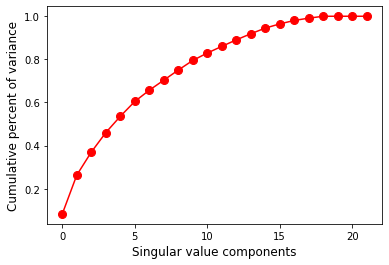

In [48]:
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [50]:
#get a table with 19 separated features of movies.
n = 23
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=movie_data_new.title.tolist())
latent_matrix_1_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
"Big Chill, The (1983)",0.880805,0.263147,-0.163847,-0.342419,0.023540,0.064782,0.037065,-0.013929,-0.049162,-0.025851,...,-0.006304,0.005090,-0.001117,-0.006886,0.010001,0.000676,0.002798,3.313012e-17,4.512786e-18,4.975510e-18
"Outsiders, The (1983)",0.777753,-0.548877,-0.209051,-0.193620,0.081430,0.053544,0.005691,-0.006330,-0.002635,0.009675,...,0.004653,-0.002996,-0.009437,-0.004220,0.004607,-0.001963,0.000401,-5.607742e-19,5.251627e-19,2.173550e-18
2001: A Space Odyssey (1968),0.300801,-0.134228,0.301929,0.066496,0.642891,0.161439,0.331611,-0.018568,0.299735,-0.114284,...,-0.267722,-0.098045,0.125266,-0.032672,-0.010059,-0.003475,-0.046937,-1.386545e-16,4.857226e-17,-2.775558e-17
Harry Potter and the Order of the Phoenix (2007),0.242578,-0.102262,0.101203,0.024192,0.334675,-0.066281,-0.347034,-0.041440,0.179060,-0.051886,...,-0.086570,0.321625,0.186552,-0.017930,0.035775,-0.002797,0.664820,8.523876e-16,-3.648114e-17,3.136646e-17
Misery (1990),0.411714,-0.264630,0.473481,-0.005170,-0.290013,0.584550,-0.239165,-0.009133,-0.109795,0.052343,...,-0.155871,-0.004914,-0.012038,-0.002853,0.005528,-0.000447,0.004644,-2.919742e-16,-4.520168e-17,-8.574124e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Passion in the Desert (1998),0.432352,-0.239026,0.074279,-0.027860,0.409797,-0.123315,-0.328776,-0.043527,0.098724,-0.053668,...,-0.445446,-0.217977,0.205913,-0.073053,0.029483,-0.004308,-0.031759,-3.355989e-16,-6.051062e-17,-8.628217e-17
Assassination Tango (2002),0.549129,-0.388069,0.380858,-0.049055,-0.272300,0.095984,-0.050712,-0.017311,-0.186388,-0.490693,...,-0.138290,0.069504,0.001471,0.005612,0.007648,-0.006610,0.000663,-1.268273e-16,-3.088518e-17,3.637701e-17
"Front Page, The (1931)",0.819847,0.281258,-0.247194,0.420216,-0.065886,0.018265,0.045290,-0.002517,-0.026846,0.004654,...,-0.018748,-0.008771,-0.043843,-0.006483,0.004805,-0.000261,0.003315,-6.939849e-18,5.362014e-18,-1.001294e-17
Looker (1981),0.322315,-0.174817,0.559492,0.071502,0.158491,0.616187,0.311746,0.000451,0.141347,-0.037993,...,-0.108633,0.025894,-0.006516,0.008013,-0.021192,-0.001118,-0.021997,-1.455184e-16,4.072724e-17,1.581860e-17


### Collaborative

In [21]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5000) #split 52518 users into 10000 users
latent_matrix_2 = svd.fit_transform(user_movies_data)

In [29]:
latent_matrix_2_df = pd.DataFrame(latent_matrix_2, index=movie_data_new.title.tolist())

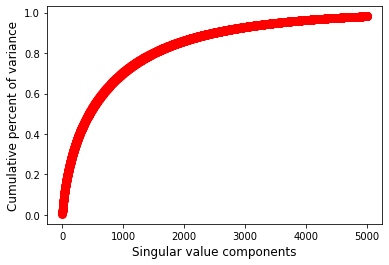

In [31]:
# plot variance expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()


In [51]:
from sklearn.metrics.pairwise import cosine_similarity

a_1 = np.array(latent_matrix_1_df.loc["Harry Potter and the Order of the Phoenix (2007)"]).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc["Harry Potter and the Order of the Phoenix (2007)"]).reshape(1, -1)

# calculate the similartity of this movie with the others in the list
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# an average measure of both content and collaborative 
hybrid = ((score_1 + score_2)/2.0)

# form a data frame of similar movies 
dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid}
similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index)

#sort it on the basis of either: content, collaborative or hybrid
similar.sort_values('hybrid', ascending=False, inplace=True)

print(similar[1:].head(11))

                                                     content  collaborative  \
Hobbit: The Desolation of Smaug, The (2013)         0.970805   1.558466e-04   
Hobbit: An Unexpected Journey, The (2012)           0.970805   5.291452e-05   
Jack the Giant Slayer (2013)                        0.970805   3.611621e-05   
Harry Potter and the Prisoner of Azkaban (2004)     0.970805  -5.313727e-07   
Alice in Wonderland (2010)                          0.970805  -2.939508e-06   
Thor (2011)                                         0.932782  -1.766986e-05   
Harry Potter and the Goblet of Fire (2005)          0.908597   4.660415e-07   
Harry Potter and the Deathly Hallows: Part 1 (2...  0.901980   5.569088e-05   
Oz the Great and Powerful (2013)                    0.901980   5.438526e-06   
Thor: The Dark World (2013)                         0.901980  -5.448330e-05   
Pirates of the Caribbean: On Stranger Tides (2011)  0.901980  -5.992222e-05   

                                                   

In [52]:
from sklearn.metrics.pairwise import cosine_similarity
def recommend_similar_movies(title):
    # take the latent vectors for a selected movie from both content 
    # and collaborative matrixes
    a_1 = np.array(latent_matrix_1_df.loc[title]).reshape(1, -1)
    a_2 = np.array(latent_matrix_2_df.loc[title]).reshape(1, -1)

    # calculate the similartity of this movie with the others in the list
    score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

    # an average measure of both content and collaborative 
    hybrid = ((score_1 + score_2)/2.0)

    # form a data frame of similar movies 
    dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
    similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

    #sort it on the basis of either: content, collaborative or hybrid
    similar.sort_values('hybrid', ascending=False, inplace=True)

    print(similar[1:].head(11))

In [53]:
recommend_similar_movies("Looker (1981)")

                                             content  collaborative    hybrid
In Hell (2003)                              0.355291       0.853725  0.604508
Puppet Master III: Toulon's Revenge (1991)  0.965531       0.059472  0.512502
Fly, The (1986)                             1.000000       0.000034  0.500017
Dreamcatcher (2003)                         1.000000      -0.000078  0.499961
Splice (2009)                               0.965531       0.012607  0.489069
Stay Alive (2006)                           0.965531       0.008162  0.486847
Invasion of the Body Snatchers (1956)       0.965531       0.005593  0.485562
Flatliners (1990)                           0.965531       0.005012  0.485271
Dreamscape (1984)                           0.965531       0.002150  0.483840
Mimic (1997)                                0.965531       0.001818  0.483674
Jason X (2002)                              0.965531       0.000779  0.483155


In [56]:
recommend_similar_movies("William Shakespeare's Romeo + Juliet (1996)")

                                   content  collaborative    hybrid
Walk on the Moon, A (1999)             1.0       0.010696  0.505348
Patch of Blue, A (1965)                1.0       0.000148  0.500074
Dodsworth (1936)                       1.0       0.000108  0.500054
South, The (Sur, El) (1983)            1.0       0.000107  0.500054
Betty Blue (37°2 le matin) (1986)      1.0       0.000107  0.500053
Last Tycoon, The (1976)                1.0       0.000052  0.500026
Guinevere (1999)                       1.0       0.000048  0.500024
Jane Eyre (2011)                       1.0       0.000048  0.500024
My Life Without Me (2003)              1.0       0.000045  0.500022
Penny Serenade (1941)                  1.0       0.000041  0.500021
Head-On (Gegen die Wand) (2004)        1.0       0.000037  0.500019


In [59]:
recommend_similar_movies("Batman Begins (2005)")

                                                     content  collaborative  \
Dark Knight, The (2008)                             0.967158       0.000067   
Eagle Eye (2008)                                    0.928391       0.009718   
Fast & Furious 6 (Fast and the Furious 6, The) ...  0.928391      -0.000309   
Good Day to Die Hard, A (2013)                      0.928391      -0.008945   
Dark Knight Rises, The (2012)                       0.902186       0.008201   
Man of Tai Chi (2013)                               0.880907      -0.007631   
Night at the Museum: Battle of the Smithsonian ...  0.831372       0.036571   
Fast Five (Fast and the Furious 5, The) (2011)      0.901933      -0.066716   
RoboCop (2014)                                      0.807691      -0.001357   
Green Hornet, The (2011)                            0.800284       0.002397   
Mortal Instruments: City of Bones, The (2013)       0.748907       0.032119   

                                                   

# Surprise

In [17]:
# pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
     |████████████████████████████████| 11.8 MB 4.6 MB/s            
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for scikit-surprise, since package 'wheel' is not installed.
    Running setup.py install for scikit-surprise ... done
Note: you may need to restart the kernel to use updated packages.


In [18]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [23]:
Mapping_file = dict(zip(movie_data_new.title.tolist(), movie_data_new.movieId.tolist()))

In [22]:
# instantiate a reader and read in our rating data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratingsNew[['userId','movieId','rating']], reader)

# train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)

# check the accuracy using Root Mean Square Error
accuracy.rmse(predictions)

RMSE: 0.9549


0.9548759470847664

In [24]:
def pred_user_rating(ui):
    if ui in ratingsNew.userId.unique():
        ui_list = ratingsNew[ratingsNew.userId == ui].movieId.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}        
        predictedL = []
        for i, j in d.items():     
            predicted = algorithm.predict(ui, j)
            predictedL.append((i, predicted[3])) 
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings'])
        pdf.sort_values('ratings', ascending=False, inplace=True)  
        pdf.set_index('movies', inplace=True)    
        return pdf.head(10)        
    else:
        print("User Id does not exist in the list!")
        return None

In [25]:
pred_user_rating(1)

,ratings
movies,
On the Waterfront (1954),4.622080
Memento (2000),4.550471
Casablanca (1942),4.549580
Spirited Away (Sen to Chihiro no kamikakushi) (2001),4.497891
Bonnie and Clyde (1967),4.450918
"Maltese Falcon, The (1941)",4.429600
Taxi Driver (1976),4.402652
Rear Window (1954),4.396483
Wallace & Gromit: A Close Shave (1995),4.376240


In [32]:
pred_user_rating(20)

User Id does not exist in the list!


In [31]:
pred_user_rating(632)

,ratings
movies,
Casablanca (1942),4.471126
"Godfather, The (1972)",4.464131
How to Train Your Dragon (2010),4.332031
Life Is Beautiful (La Vita è bella) (1997),4.279147
On the Waterfront (1954),4.277590
Wallace & Gromit: The Wrong Trousers (1993),4.274884
American History X (1998),4.266233
Schindler's List (1993),4.246176
Braveheart (1995),4.244018


In [33]:
# pip install turicreate

     |████████████████████████████████| 33.3 MB 17.5 MB/s            
     |████████████████████████████████| 63 kB 7.0 MB/s             
     |████████████████████████████████| 322 kB 18.2 MB/s            
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 3.5 MB 6.7 MB/s            
     |████████████████████████████████| 198.9 MB 31.3 MB/s            
     |████████████████████████████████| 979 kB 99.0 MB/s            
     |████████████████████████████████| 2.2 MB 57.2 MB/s            
  Using cached idna-3.4-py3-none-any.whl (61 kB)
     |████████████████████████████████| 162 kB 119.5 MB/s            
     |████████████████████████████████| 143 kB 22.2 MB/s            
     |████████████████████████████████| 2.9 MB 42.8 MB/s            
     |████████████████████████████████| 132 kB 2.7 MB/s             
     |████████████████████████████████| 4.4 MB 92.8 MB/s            
     |████████████████████████████████|

In [34]:
import turicreate

In [53]:
ratingsNew_2 = rating_data.sample(n=1000).reset_index()
ratingsNew_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      1000 non-null   int64  
 1   userId     1000 non-null   int64  
 2   movieId    1000 non-null   int64  
 3   rating     1000 non-null   float64
 4   timestamp  1000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [54]:
ratingsNew_2 = ratingsNew_2[['userId', 'movieId', 'rating', 'timestamp']].drop_duplicates()
ratingsNew_2

,userId,movieId,rating,timestamp
0,79279,5349,4.0,1185039941
1,76365,1573,4.0,1020122408
2,71828,627,5.0,867929343
3,15360,293,4.0,974705956
4,40371,3968,2.0,1287684732
...,...,...,...,...
995,6266,236,4.0,846670808
996,55899,1299,4.0,955388729
997,109227,19,0.5,1279667375
998,38372,3948,3.0,1208282346


In [64]:
total_rows = len(ratingsNew)
split_index = int(0.25 * total_rows)

In [65]:
testset = ratingsNew.iloc[:split_index]
trainset = ratingsNew.iloc[split_index:]

testset.reset_index(drop=True, inplace=True)
trainset.reset_index(drop=True, inplace=True)

In [68]:
train_data = turicreate.SFrame(trainset)
test_data = turicreate.SFrame(testset)

In [70]:
popularity_model = turicreate.popularity_recommender.create(train_data, user_id='userId', item_id='movieId', target='rating')

Warning: Ignoring columns index, timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 75000 observations with 43541 users and 7651 items.

Data prepared in: 0.073776s

75000 observations to process; with 7651 unique items.

In [71]:
popularity_recomm = popularity_model.recommend(users=[1,2,3,4,5],k=5)
popularity_recomm.print_rows(num_rows=25)

+--------+---------+-------+------+
| userId | movieId | score | rank |
+--------+---------+-------+------+
|   1    |   5063  |  5.0  |  1   |
|   1    |  26649  |  5.0  |  2   |
|   1    |   7095  |  5.0  |  3   |
|   1    |   893   |  5.0  |  4   |
|   1    |  31447  |  5.0  |  5   |
|   2    |   5063  |  5.0  |  1   |
|   2    |  26649  |  5.0  |  2   |
|   2    |   7095  |  5.0  |  3   |
|   2    |   893   |  5.0  |  4   |
|   2    |  31447  |  5.0  |  5   |
|   3    |   5063  |  5.0  |  1   |
|   3    |  26649  |  5.0  |  2   |
|   3    |   7095  |  5.0  |  3   |
|   3    |   893   |  5.0  |  4   |
|   3    |  31447  |  5.0  |  5   |
|   4    |   5063  |  5.0  |  1   |
|   4    |  26649  |  5.0  |  2   |
|   4    |   7095  |  5.0  |  3   |
|   4    |   893   |  5.0  |  4   |
|   4    |  31447  |  5.0  |  5   |
|   5    |   5063  |  5.0  |  1   |
|   5    |  26649  |  5.0  |  2   |
|   5    |   7095  |  5.0  |  3   |
|   5    |   893   |  5.0  |  4   |
|   5    |  31447  |  5.0  |

In [72]:
item_sim_model = turicreate.item_similarity_recommender.create(train_data, user_id='userId', item_id='movieId', target='rating', similarity_type='cosine')

Warning: Ignoring columns index, timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 75000 observations with 43541 users and 7651 items.

Data prepared in: 0.086675s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.4ms                          | 2.25       |

| 9.674ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 107.609ms                           | 0                | 0               |

| 200.886ms                           | 100              | 7651            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.21819s

In [73]:
item_sim_recomm = item_sim_model.recommend(users=[1,2,3,4,5],k=5)
item_sim_recomm.print_rows(num_rows=25)

+--------+---------+-----------------------+------+
| userId | movieId |         score         | rank |
+--------+---------+-----------------------+------+
|   1    |  94070  |   0.3778707981109619  |  1   |
|   1    |   558   |   0.3778707981109619  |  2   |
|   1    |   3701  |  0.35866767168045044  |  3   |
|   1    |  54004  |   0.3365015387535095  |  4   |
|   1    |   7614  |   0.3112124800682068  |  5   |
|   2    |   398   | 0.0029947400093078614 |  1   |
|   2    |   1671  |  0.002954211235046387 |  2   |
|   2    |   3133  | 0.0028123414516448976 |  3   |
|   2    |   387   | 0.0026794922351837157 |  4   |
|   2    |   1008  |  0.002606053352355957 |  5   |
|   3    |   498   |   0.809154748916626   |  1   |
|   3    |  100843 |   0.6726915836334229  |  2   |
|   3    |   6961  |   0.5979480743408203  |  3   |
|   3    |  81736  |   0.5979480743408203  |  4   |
|   3    |  26403  |   0.5057216882705688  |  5   |
|   4    |   398   | 0.0029947400093078614 |  1   |
|   4    |  